**Este conjunto de datos esta diseñado para analizar factores asociados al rendimiento académico y la probabilidad de abandono o graduación de estudiantes en educación superior.**


Información demográfica y personal:
 - Marital status: Estado civil del estudiante (soltero, casado, etc.).
 - Nacionality: Nacionalidad del estudiante.
 - Mother's qualification / Father's qualification: Nivel educativo de la madre y del padre, lo cual puede influir en el rendimiento académico del estudiante.
 - Mother's occupation / Father's occupation: Ocupación de los padres, que podría correlacionarse con el nivel socioeconómico de la familia.
Gender: Género del estudiante.


Información académica y de admisión:
 - Application mode / Application order: Modalidad y orden de aplicación a la universidad, lo que puede reflejar la preferencia o necesidad de los estudiantes por ciertas instituciones.
 - Previous qualification / Previous qualification (grade): Calificación y tipo de estudios previos del estudiante, indicadores de su preparación antes de la universidad.
 - Admission grade: Calificación de admisión del estudiante, que puede ser un predictor de rendimiento.
Age at enrollment: Edad al momento de inscribirse, que podría influir en el tipo de dificultades académicas que enfrenta.


Características del curso y desempeño:
 - Course: Programa o carrera en el que está inscrito el estudiante.
 - Daytime/evening attendance: Indica si el estudiante asiste a clases en horario diurno o vespertino.
 - Curricular units 1st sem / Curricular units 2nd sem: Información sobre las unidades curriculares o materias inscritas, evaluadas, aprobadas, y las calificaciones obtenidas en el primer y segundo semestre.


Información financiera:
 - Debtor: Indica si el estudiante tiene deudas con la institución, lo cual puede ser un factor de riesgo de deserción.
 - Tuition fees up to date: Muestra si el estudiante está al día con los pagos de matrícula.
 - Scholarship holder: Indica si el estudiante es beneficiario de una beca.


Condiciones sociales y económicas:
Unemployment rate / Inflation rate / GDP: Tasas de desempleo, inflación, y producto interno bruto (PIB) en el contexto del país o región donde estudia el alumno, lo cual puede impactar su situación financiera y, potencialmente, su rendimiento académico.

- Target: Es la variable objetivo que indica el resultado final del estudiante en términos de su estatus académico. Las etiquetas como "Dropout" (desertor) o "Graduate" (graduado) sugieren que el objetivo del análisis es clasificar o predecir si un estudiante va a abandonar o a completar sus estudios.


## Objetivo del dataset 
**Este conjunto de datos permite realizar un análisis de factores asociados a la deserción o éxito académico en estudiantes universitarios.**

 - Identificar los factores de riesgo de abandono.
 - Crear modelos de aprendizaje automático para predecir el abandono o graduación.
 - Explorar cómo diferentes variables demográficas, socioeconómicas y académicas afectan la probabilidad de éxito en la educación superior.

Para iniciar el análisis de datos, lo primero que realizamos fue cargar el dataset utilizando la biblioteca pandas de Python, una herramienta muy útil para manejar y analizar datos estructurados. El archivo que contiene la información está en formato CSV, por lo que usamos el método read_csv especificando el delimitador ';', ya que este archivo utiliza punto y coma para separar los valores.

Después de cargar los datos, mostramos las columnas disponibles en el dataset con el objetivo de entender su estructura y verificar qué información contiene. Esto me permitió identificar las variables que podrían ser relevantes para el análisis posterior.

In [71]:
import pandas as pd

# Cargar el dataset con el delimitador adecuado
data = pd.read_csv('/Users/cristiangaytan/Downloads/data 2.csv', delimiter=';')

# Mostrar las columnas del dataset
print(data.columns)


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd

Para avanzar en el análisis ,seguimos un enfoque ordenado para preparar el dataset. En primer lugar, separamos las características (X) y la etiqueta objetivo (y). Para ello, eliminamos la columna 'Target' del conjunto de datos principal y la asignamos a la variable y. Esto nos permitió organizar claramente las variables que predicen el comportamiento del estudiante y la variable que queremos predecir.

Posteriormente, dividimos el dataset en un conjunto de entrenamiento y un conjunto de prueba utilizando la función train_test_split de la biblioteca scikit-learn. Optamos por asignar un 80% de los datos para el entrenamiento y un 20% para la prueba, manteniendo un random_state de 42 para garantizar la reproducibilidad de los resultados.

Por último, imprimimos los tamaños de ambos conjuntos para verificar que la partición se realizó correctamente. Este paso es crucial para asegurarnos de que contamos con suficientes datos tanto para entrenar el modelo como para evaluar su desempeño.

In [73]:

X = data.drop(columns='Target')  # Eliminar la columna objetivo
y = data['Target']  # Tomar la columna objetivo como 'y'

#Dividir el dataset en conjunto de entrenamiento y prueba
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar el tamaño de los conjuntos de entrenamiento y prueba
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)


Tamaño del conjunto de entrenamiento: (3539, 36)
Tamaño del conjunto de prueba: (885, 36)


En este punto del proyecto, abordamos el manejo de valores nulos para asegurar que nuestro dataset estuviera listo para el análisis y la modelización. 

Ignorar advertencias: 
Inicialmente, desactivamos las advertencias usando warnings.filterwarnings("ignore") para mantener la salida limpia y centrarnos en el proceso de limpieza de datos.

Identificación de columnas numéricas: 
Filtramos las columnas numéricas utilizando select_dtypes, que detecta aquellas con tipos de datos float64 e int64. Estas columnas se almacenaron en la variable numeric_cols.

Rellenar valores nulos en columnas numéricas: 
Para manejar los valores faltantes en las columnas numéricas, optamos por reemplazarlos con la media de cada columna. Este método es útil porque mantiene la tendencia central de los datos, evitando sesgos significativos.
Identificación de columnas categóricas: De manera similar, identificamos las columnas categóricas utilizando select_dtypes, seleccionando las de tipo object.

Rellenar valores nulos en columnas categóricas: 
Para las columnas categóricas, decidimos rellenar los valores faltantes con el modo (el valor más frecuente de la columna). Esto es práctico en datos categóricos, ya que evita crear nuevas categorías vacías.
Verificación de valores nulos: Finalmente, verificamos si aún había valores nulos en el dataset utilizando data.isnull().sum(). Esto nos permitió confirmar que todas las columnas estaban completamente limpias y listas para la siguiente etapa del análisis.

In [75]:
import warnings
warnings.filterwarnings("ignore")

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Rellenamos los valores nulos con la media para las columnas numéricas
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].mean())

# Identificamos las columnas categóricas
categorical_cols = data.select_dtypes(include=['object']).columns

# Rellenamos los valores nulos en las columnas categóricas con el valor más frecuente (modo)
for col in categorical_cols:
    data[col].fillna(data[col].mode()[0], inplace=True)

# Verificación de si hay valores nulos
print("Valores nulos por columna:\n", data.isnull().sum())

Valores nulos por columna:
 Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                  

Abordamos la transformación de las variables categóricas en datos numéricos mediante el uso de Label Encoding, un paso fundamental para que los modelos de aprendizaje automático puedan procesar estas variables. 
El resultado que obtuvimos refleja la codificación numérica de las categorías originales en la columna Target (nuestra variable objetivo).

Transformación de categorías a números:
El algoritmo de LabelEncoder asigna un número entero a cada categoría única en la columna. Este proceso convierte las etiquetas categóricas, como Aprobado, Reprobado, o Abandono, en valores numéricos, por ejemplo, 0, 1, 2.
En tu caso, parece que Target tenía tres categorías únicas, las cuales se codificaron como:

Una categoría fue asignada el valor 0.
Otra el valor 1.
Otra el valor 2.
Muestra de los datos codificados:
Cuando solicitaste la "muestra", se imprimieron los valores de las primeras filas de la columna Target. En este caso, los valores 0, 2, y así sucesivamente representan las categorías originales de la columna objetivo.
Por qué los números son diferentes:
La asignación de números a categorías depende del orden alfabético de las mismas, que es la forma predeterminada en la que opera LabelEncoder.



In [77]:
from sklearn.preprocessing import LabelEncoder

# Codificar variables categóricas en formato numérico (Label Encoding)
label_encoders = {}

for col in categorical_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))  # Convertimos a str para evitar problemas
    label_encoders[col] = le

# Verificación de la codificación
print("Muestra de los datos codificados:\n", data[categorical_cols].head())


Muestra de los datos codificados:
    Target
0       0
1       2
2       0
3       2
4       2


En este paso, nos centramos en la normalización de las columnas numéricas de nuestro dataset. La normalización es una técnica fundamental en el preprocesamiento de datos, especialmente para los algoritmos de aprendizaje automático que asumen que las características tienen escalas similares. Si las características tienen rangos muy distintos, puede afectar el rendimiento del modelo, así que es importante poner todas las características en la misma escala.

Para realizar esto, utilizamos el StandardScaler de scikit-learn, que ajusta los datos para que tengan una media de 0 y una desviación estándar de 1.

In [79]:
from sklearn.preprocessing import StandardScaler

# Normalizamos las columnas numéricas
scaler = StandardScaler()
data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

# Verificación de la normalización
print("Muestra de los datos normalizados:\n", data[numeric_cols].head())



Muestra de los datos normalizados:
    Marital status  Application mode  Application order    Course  \
0       -0.294829         -0.095470           2.490896 -4.209520   
1       -0.294829         -0.209869          -0.554068  0.192580   
2       -0.294829         -1.010660           2.490896  0.103404   
3       -0.294829         -0.095470           0.207173  0.444115   
4        1.356212          1.162916          -0.554068 -0.408389   

   Daytime/evening attendance\t  Previous qualification  \
0                      0.350082                -0.35023   
1                      0.350082                -0.35023   
2                      0.350082                -0.35023   
3                      0.350082                -0.35023   
4                     -2.856470                -0.35023   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.804841    -0.126298               -0.036018   
1                        2.076819    -0.126298      

procedemos a separar las características (X) de la etiqueta o variable objetivo (y). Este paso es esencial en el preprocesamiento de datos, ya que los algoritmos de aprendizaje automático necesitan trabajar con las características (las entradas) para predecir la etiqueta (la salida).

X debería contener todas las columnas que representan características del dataset, excluyendo Target.

y debería contener únicamente los valores de la columna Target, que corresponden a las categorías codificadas que preparamos anteriormente (como Enrolled, Graduate o Dropout).



In [81]:
# Separar las características (X) y la etiqueta (y)
X = data.drop(columns='Target')  # Excluimos la columna 'Target'
y = data['Target']  # La columna objetivo es 'Target'

# Verificación de las primeras filas de X y y
print("Primeras filas de X:\n", X.head())
print("Primeras filas de y:\n", y.head())


Primeras filas de X:
    Marital status  Application mode  Application order    Course  \
0       -0.294829         -0.095470           2.490896 -4.209520   
1       -0.294829         -0.209869          -0.554068  0.192580   
2       -0.294829         -1.010660           2.490896  0.103404   
3       -0.294829         -0.095470           0.207173  0.444115   
4        1.356212          1.162916          -0.554068 -0.408389   

   Daytime/evening attendance\t  Previous qualification  \
0                      0.350082                -0.35023   
1                      0.350082                -0.35023   
2                      0.350082                -0.35023   
3                      0.350082                -0.35023   
4                     -2.856470                -0.35023   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.804841    -0.126298               -0.036018   
1                        2.076819    -0.126298               -1.18

### Análisis Exploratorio de Datos (EDA)
- Analizar la distribución de la variable objetivo (Target) para ver la proporción de "Dropout" vs. "Graduate".
- Visualizar correlaciones entre variables numéricas y la variable objetivo.
- Explorar cómo las variables como el estado financiero, la educación de los padres o el desempeño académico afectan el abandono/graduación.

En este paso, decidimos visualizar la distribución de la variable objetivo (Target) para analizar cómo se encuentran distribuidas sus categorías. Esto nos da una idea inicial de si los datos están equilibrados o si hay clases con más representación que otras, lo cual es crucial al momento de entrenar un modelo de machine learning.

importamos las bibliotecas necesarias, Matplotlib y Seaborn, que son herramientas poderosas para la visualización de datos. Posteriormente, utilizamos la función countplot de Seaborn para crear un gráfico de barras que muestra la cantidad de registros en cada categoría de Target.

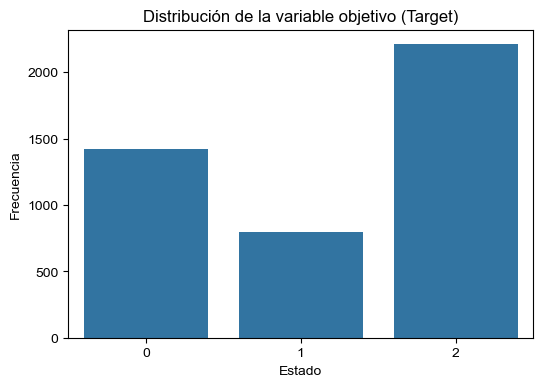

In [83]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualizar la distribución de la variable objetivo
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=data)
plt.title('Distribución de la variable objetivo (Target)')
plt.xlabel('Estado')
plt.ylabel('Frecuencia')
plt.show()


Para profundizar en la relación entre las variables numéricas y la variable objetivo (Target), generamos un mapa de calor que destaca las correlaciones. Esto nos ayuda a identificar qué variables están más relacionadas con Target y, por ende, podrían ser más relevantes al construir modelos predictivos.

El mapa de calor muestra los coeficientes de correlación de Pearson entre Target y las demás variables numéricas. Los valores pueden interpretarse como:

Positivos cercanos a 1: Relación positiva fuerte (a medida que la variable aumenta, Target también tiende a aumentar).

Negativos cercanos a -1: Relación negativa fuerte (a medida que la variable aumenta, Target tiende a disminuir).

Cercanos a 0: Relación débil o inexistente.

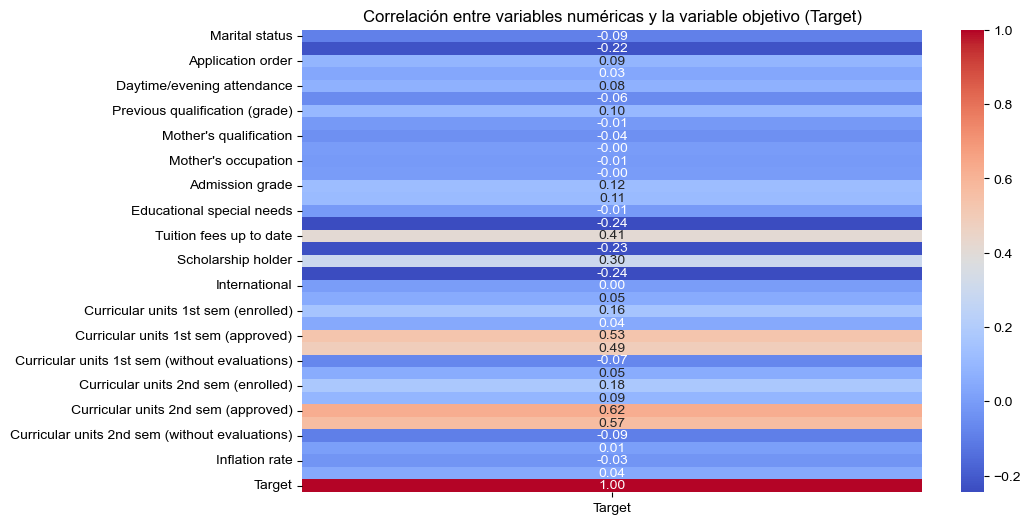

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Cambiar la fuente de matplotlib
plt.rcParams['font.family'] = 'Arial'
# Limpiar los nombres de las columnas de caracteres no visibles o especiales
data.columns = data.columns.str.replace('\t', '', regex=True)


# Ahora genera nuevamente el gráfico
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix[['Target']], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables numéricas y la variable objetivo (Target)')
plt.show()


Para garantizar que los nombres de las columnas de nuestro conjunto de datos estén limpios y no contengan caracteres no deseados como tabulaciones (\t) u otros caracteres especiales.

In [87]:
# Eliminar tabulaciones y otros caracteres especiales de los nombres de las columnas
data.columns = data.columns.str.replace('\t', '', regex=True)

# Verificar que los nombres de las columnas estén limpios
print(data.columns)


Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd s


Una vez que hemos completado varias etapas de preprocesamiento en nuestro conjunto de datos, como la limpieza de nombres de columnas y la normalización, es fundamental realizar una verificación visual de las primeras filas del dataframe. Esto nos permite asegurarnos de que los datos se encuentren en un formato correcto y que las transformaciones realizadas se hayan aplicado como esperábamos.

In [89]:
# Ver las primeras filas del dataframe para asegurarse de que los datos se vean correctos
print(data.head())


   Marital status  Application mode  Application order    Course  \
0       -0.294829         -0.095470           2.490896 -4.209520   
1       -0.294829         -0.209869          -0.554068  0.192580   
2       -0.294829         -1.010660           2.490896  0.103404   
3       -0.294829         -0.095470           0.207173  0.444115   
4        1.356212          1.162916          -0.554068 -0.408389   

   Daytime/evening attendance  Previous qualification  \
0                    0.350082                -0.35023   
1                    0.350082                -0.35023   
2                    0.350082                -0.35023   
3                    0.350082                -0.35023   
4                   -2.856470                -0.35023   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                       -0.804841    -0.126298               -0.036018   
1                        2.076819    -0.126298               -1.189759   
2                       -0

En este caso, nos enfocamos en la relación entre el estado civil (Marital status) y la variable objetivo (Target).

Para ello, utilizamos un gráfico de barras agrupadas con la biblioteca Seaborn, que nos permite observar cómo se distribuyen las diferentes categorías del estado civil en función de las clases de la variable objetivo (Target). Este gráfico también nos ayuda a identificar posibles relaciones o tendencias entre estas variables

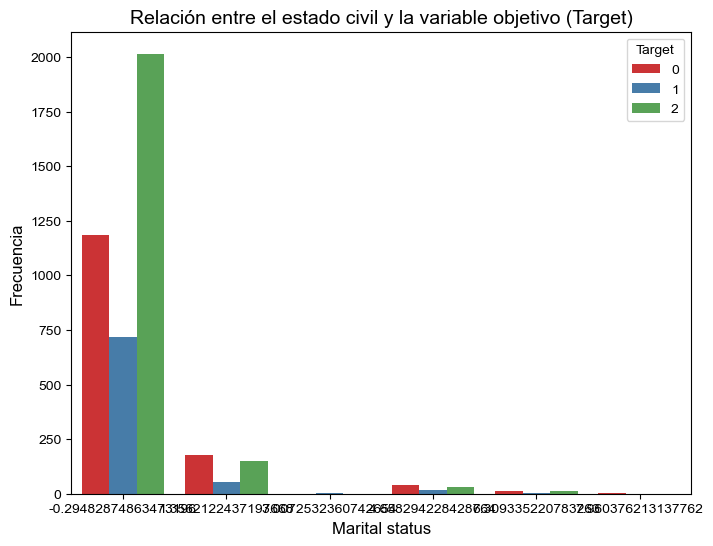

In [91]:
# Visualización de la relación entre 'Marital status' y la variable 'Target'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Marital status', hue='Target', palette='Set1')
plt.title('Relación entre el estado civil y la variable objetivo (Target)', fontsize=14)
plt.xlabel('Marital status', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.show()


Esta vez, analizamos la relación entre las calificaciones de la madre (Mother's qualification) y el estado del estudiante representado en la variable objetivo.

Utilizamos un gráfico de barras agrupadas para visualizar cómo se distribuyen las diferentes calificaciones de las madres en relación con las clases de Target.

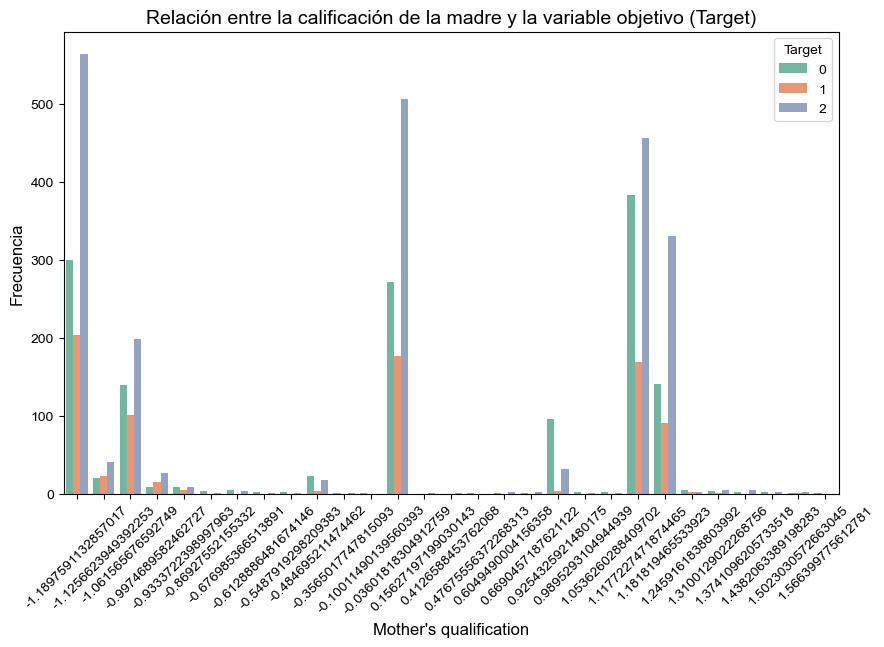

In [93]:
# Relación entre 'Mother's qualification' y la variable 'Target'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Mother's qualification", hue='Target', palette='Set2')
plt.title("Relación entre la calificación de la madre y la variable objetivo (Target)", fontsize=14)
plt.xlabel("Mother's qualification", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45)
plt.show()


Examinamos cómo las calificaciones del padre (Father's qualification) se relacionan con la variable objetivo (Target)

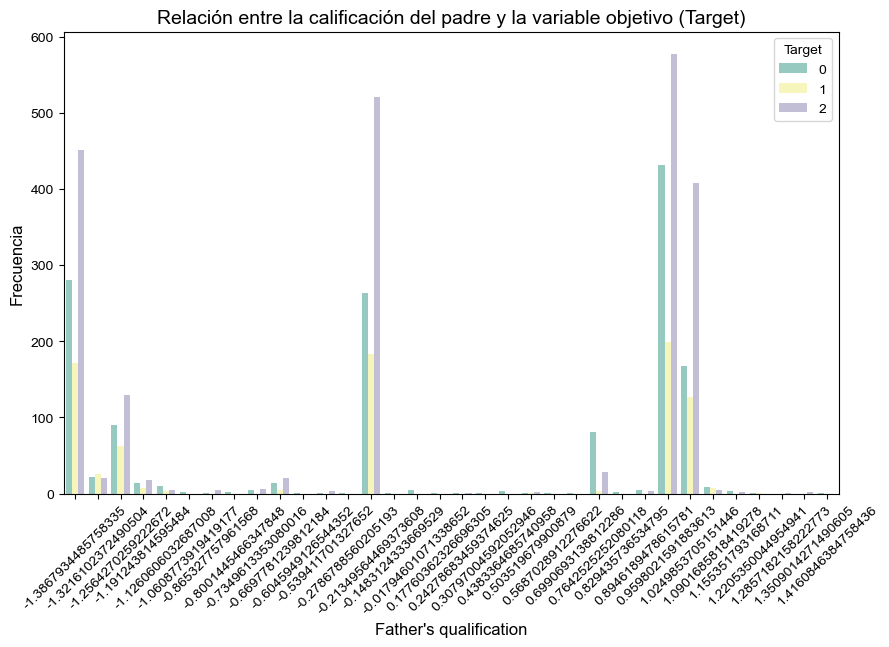

In [95]:
# Relación entre 'Father's qualification' y la variable 'Target'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x="Father's qualification", hue='Target', palette='Set3')
plt.title("Relación entre la calificación del padre y la variable objetivo (Target)", fontsize=14)
plt.xlabel("Father's qualification", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45)
plt.show()


En este paso del análisis exploratorio, examinamos cómo la calificación previa (Previous qualification) de los estudiantes está asociada con la variable objetivo (Target). Esto nos permite evaluar si el desempeño académico previo tiene una correlación con los resultados finales, como graduarse, abandonar o permanecer matriculado.


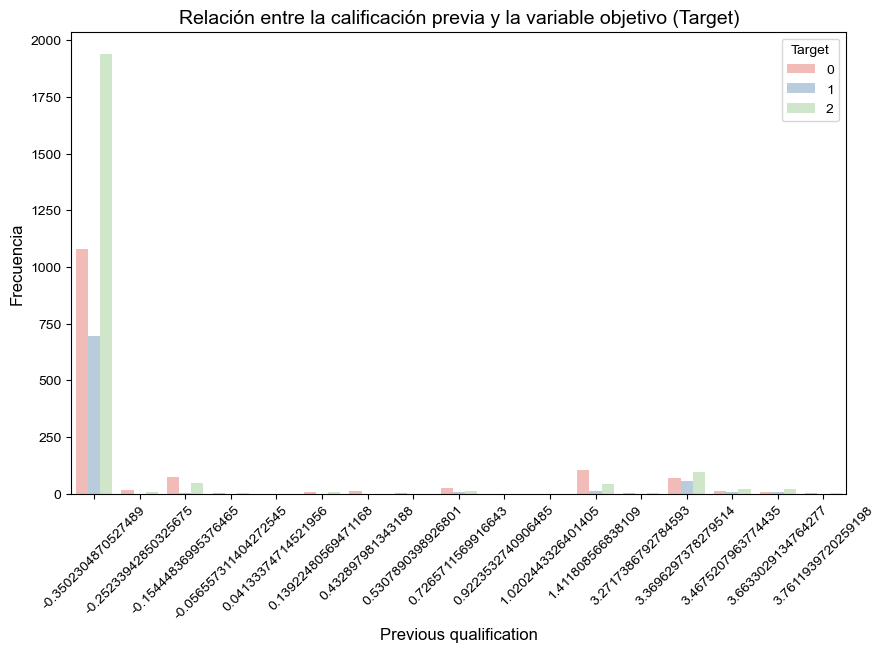

In [97]:
# Relación entre 'Previous qualification' y la variable 'Target'
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='Previous qualification', hue='Target', palette='Pastel1')
plt.title("Relación entre la calificación previa y la variable objetivo (Target)", fontsize=14)
plt.xlabel("Previous qualification", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.xticks(rotation=45)
plt.show()


Queremos examinar cómo el estado de pago de la matrícula (Tuition fees up to date) se relaciona con la variable objetivo (Target). Este análisis es clave para evaluar si la regularización de pagos influye en los resultados académicos y el comportamiento de los estudiantes, como su graduación o abandono.

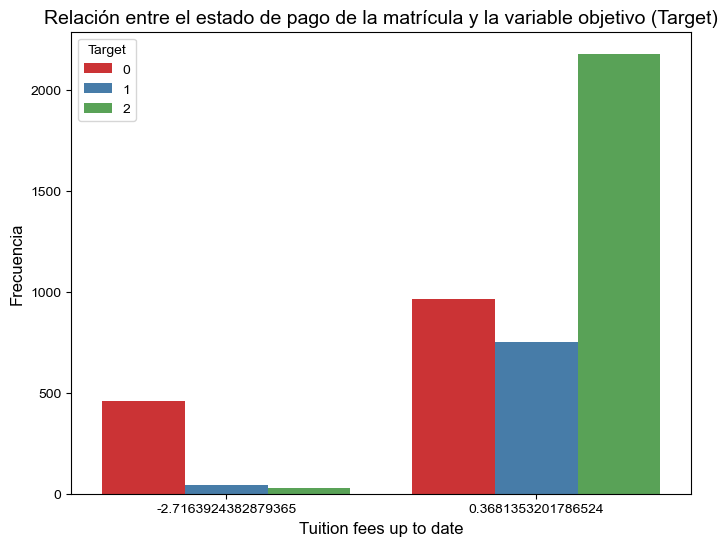

In [99]:
# Relación entre 'Tuition fees up to date' y la variable 'Target'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Tuition fees up to date', hue='Target', palette='Set1')
plt.title("Relación entre el estado de pago de la matrícula y la variable objetivo (Target)", fontsize=14)
plt.xlabel("Tuition fees up to date", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.show()


En este gráfico exploramos cómo el género de los estudiantes se asocia con la variable objetivo (Target).

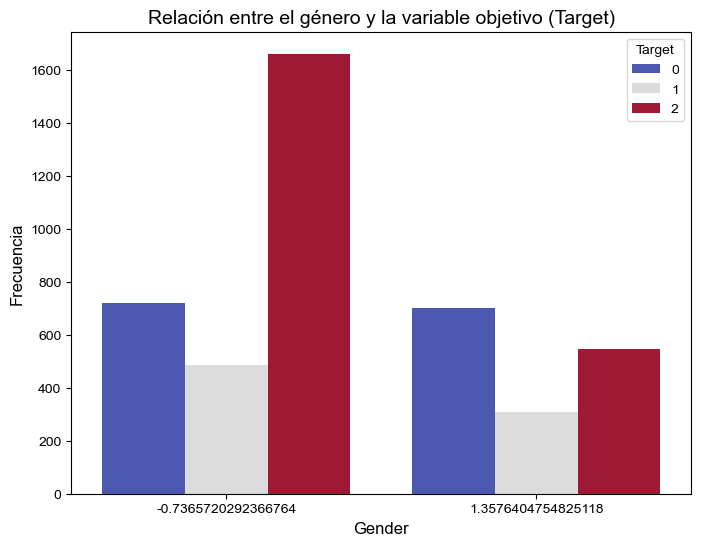

In [101]:
# Relación entre 'Gender' y la variable 'Target'
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='Gender', hue='Target', palette='coolwarm')
plt.title("Relación entre el género y la variable objetivo (Target)", fontsize=14)
plt.xlabel("Gender", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.show()



El gráfico que estás generando es un boxplot para visualizar la relación entre la variable Age at enrollment y la variable objetivo Target.

Gráfico de caja:
 La variable Age at enrollment se distribuye entre las categorías de la variable Target. El eje X muestra las categorías de la variable Target, y el eje Y muestra los valores de Age at enrollment.

Visualización de la mediana y los cuartiles:
 Cada caja representa el rango intercuartílico (entre el primer y tercer cuartil), y la línea dentro de la caja indica la mediana. Los "bigotes" de la caja muestran el rango de los datos, mientras que los puntos fuera de los bigotes son considerados valores atípicos.


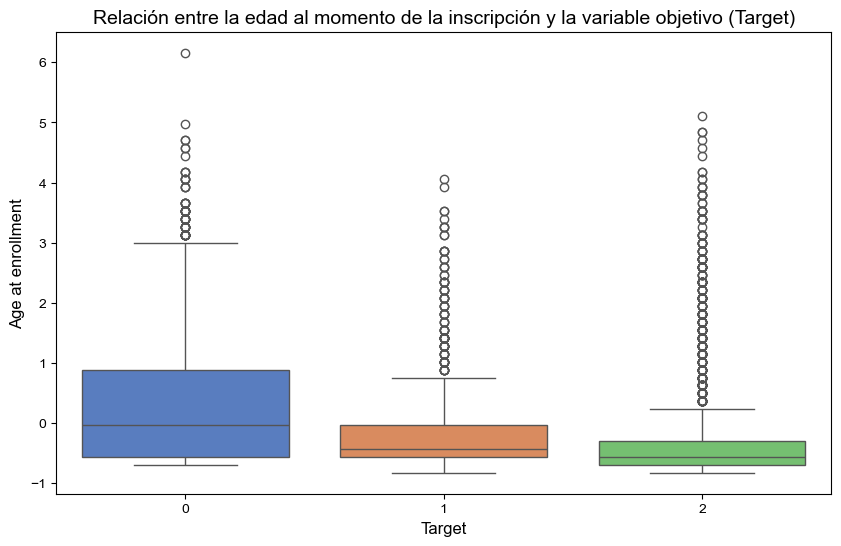

In [51]:
# Relación entre 'Age at enrollment' y la variable 'Target'
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Target', y='Age at enrollment', palette='muted')
plt.title("Relación entre la edad al momento de la inscripción y la variable objetivo (Target)", fontsize=14)
plt.xlabel("Target", fontsize=12)
plt.ylabel("Age at enrollment", fontsize=12)
plt.show()


### Selección de Modelos.
Dado que este es un problema de clasificación, algunos modelos que podrían aplicarse incluyen:

 - Regresión Logística: Un modelo simple y efectivo para clasificación binaria que puede usarse como línea base.

- Árboles de Decisión y Bosques Aleatorios (Random Forests): Estos modelos son robustos y permiten capturar interacciones complejas entre variables. Los bosques aleatorios en particular son buenos para evitar el sobreajuste.

 - Máquinas de Soporte Vectorial (SVM): Útiles cuando las clases están bien separadas, aunque pueden requerir bastante preprocesamiento.
Redes Neuronales o Deep Learning: Si el dataset es suficientemente grande, podríamos probar con una red neuronal para capturar patrones no lineales complejos.

 - Gradient Boosting (como XGBoost o LightGBM): Estos modelos son potentes para tareas de clasificación y tienden a ofrecer buen rendimiento con el ajuste adecuado de hiperparámetros.

In [53]:
# Comprobar valores nulos
data.isnull().sum()

# Eliminar filas con valores nulos o rellenarlos con la media/mediana según sea necesario
data = data.dropna()  # o usa data.fillna(valor)


Utilizamos el LabelEncoder de la biblioteca scikit-learn para convertir las variables categóricas de texto en valores numéricos.

In [55]:
from sklearn.preprocessing import LabelEncoder

# Codificar variables categóricas
label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
# Puedes repetir este proceso para otras variables categóricas


En esta etapa, preparamos los datos para entrenar y probar el modelo de machine learning. Lo que hicimos fue dividir el conjunto de datos en dos partes:

Definir las variables independientes (X) y la variable dependiente (y):

Las variables independientes, que son las características o entradas de nuestro modelo, las definimos en X. Para esto, eliminamos la columna Target, ya que esa es la variable dependiente, que es lo que queremos predecir.
La variable dependiente, que es la columna Target, la definimos en y, ya que será el objetivo que intentaremos predecir utilizando las variables de entrada (X).

Dividir los datos en conjunto de entrenamiento y conjunto de prueba:

 Para evaluar el desempeño del modelo de manera confiable, es importante separar nuestros datos en un conjunto de entrenamiento (que el modelo usará para aprender) y un conjunto de prueba (que utilizaremos para evaluar la capacidad de generalización del modelo).

Usamos la función train_test_split de scikit-learn, que divide los datos de forma aleatoria en un conjunto de entrenamiento y otro de prueba. En nuestro caso, decidimos que el 80% de los datos se usarán para entrenar el modelo y el 20% restante se usará para probarlo. El parámetro random_state=42 asegura que la división de los datos sea reproducible, es decir, que obtengamos la misma división cada vez que ejecutemos el código.



In [57]:
# Definir las variables independientes (X) y la variable dependiente (y)
X = data.drop(columns=['Target'])
y = data['Target']

# Dividir los datos en conjunto de entrenamiento (80%) y conjunto de prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Estamos normalizando los datos utilizando StandardScaler de scikit-learn. Esto se hace para asegurar que las características (o variables independientes) del modelo tengan una escala similar, lo que puede mejorar el rendimiento del modelo, especialmente si estamos usando algoritmos que dependen de la distancia entre puntos, como k-NN o regresión logística.

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


En esta parte del proceso, estamos entrenando y evaluando un modelo de regresión logística para predecir la variable objetivo (Target).

El modelo de regresión logística se entrena usando los datos de entrada (X_train) y sus respectivas etiquetas (y_train).
Luego, el modelo predice las etiquetas para el conjunto de prueba (X_test) y se evalúa su desempeño en términos de accuracy y un reporte detallado de clasificación.

In [63]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report

# Crear el modelo
log_reg = LogisticRegression()

# Entrenar el modelo
log_reg.fit(X_train, y_train)

# Hacer predicciones
y_pred_log_reg = log_reg.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_log_reg))
print(classification_report(y_test, y_pred_log_reg))


Accuracy: 0.752542372881356
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       316
           1       0.45      0.28      0.34       151
           2       0.76      0.91      0.83       418

    accuracy                           0.75       885
   macro avg       0.68      0.65      0.66       885
weighted avg       0.73      0.75      0.74       885



En este bloque de código estamos entrenando y evaluando un modelo de clasificación basado en un árbol de decisión. 

Accuracy: La proporción de predicciones correctas. Un valor de accuracy cercano a 1.0 indica un modelo que hace buenas predicciones.

Classification Report: Proporciona una visión más detallada del rendimiento del modelo:

Precision: Qué tan exactas son las predicciones positivas.

Recall: Qué tan bien el modelo detecta todas las instancias de la clase 
positiva.

F1-Score: El balance entre precisión y recall.

In [65]:
from sklearn.tree import DecisionTreeClassifier

# Crear el modelo
dt = DecisionTreeClassifier()

# Entrenar el modelo
dt.fit(X_train, y_train)

# Hacer predicciones
y_pred_dt = dt.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Accuracy: 0.6836158192090396
              precision    recall  f1-score   support

           0       0.73      0.65      0.69       316
           1       0.39      0.42      0.40       151
           2       0.77      0.80      0.78       418

    accuracy                           0.68       885
   macro avg       0.63      0.63      0.63       885
weighted avg       0.69      0.68      0.68       885



En este bloque de código estamos entrenando y evaluando un modelo de clasificación basado en un bosque aleatorio (Random Forest).

Random Forest: Un modelo basado en múltiples árboles de decisión que ayuda a mejorar la precisión y reducir el riesgo de sobreajuste. 

Evaluamos el modelo con las mismas métricas que los modelos anteriores: accuracy y classification report.

In [67]:
from sklearn.ensemble import RandomForestClassifier

# Crear el modelo
rf = RandomForestClassifier()

# Entrenar el modelo
rf.fit(X_train, y_train)

# Hacer predicciones
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


Accuracy: 0.7694915254237288
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       316
           1       0.52      0.28      0.36       151
           2       0.77      0.94      0.85       418

    accuracy                           0.77       885
   macro avg       0.71      0.67      0.67       885
weighted avg       0.75      0.77      0.75       885



En este bloque de código estás entrenando y evaluando un modelo de máquinas de soporte vectorial (SVM, por sus siglas en inglés).

SVM: Un clasificador potente, especialmente útil para problemas con muchas características (alta dimensión) o cuando se requiere una separación clara entre las clases.

Evaluamos el modelo con accuracy y un classification report.

In [69]:
from sklearn.svm import SVC

# Crear el modelo
svm = SVC()

# Entrenar el modelo
svm.fit(X_train, y_train)

# Hacer predicciones
y_pred_svm = svm.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))


Accuracy: 0.7581920903954802
              precision    recall  f1-score   support

           0       0.88      0.73      0.80       316
           1       0.48      0.32      0.38       151
           2       0.75      0.94      0.83       418

    accuracy                           0.76       885
   macro avg       0.70      0.66      0.67       885
weighted avg       0.75      0.76      0.74       885



Este bloque de código está implementando un perceptrón multicapa (MLP, por sus siglas en inglés), que es un tipo de red neuronal artificial.

Creamos una instancia de MLPClassifier. En este caso, estamos especificando dos parámetros:

hidden_layer_sizes: Define el número de neuronas en cada capa oculta. En este caso, estamos usando dos capas ocultas, cada una con 50 neuronas.
max_iter: Define el número máximo de iteraciones para el entrenamiento del modelo.

Usamos el método fit() para entrenar el modelo en los datos de entrenamiento (X_train) y las etiquetas de entrenamiento (y_train).

Una vez que el modelo ha sido entrenado, utilizamos el método predict() para hacer predicciones sobre el conjunto de prueba (X_test). Los resultados se almacenan en la variable y_pred_nn.

In [71]:
from sklearn.neural_network import MLPClassifier

# Crear el modelo
nn = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)

# Entrenar el modelo
nn.fit(X_train, y_train)

# Hacer predicciones
y_pred_nn = nn.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_nn))
print(classification_report(y_test, y_pred_nn))


Accuracy: 0.7152542372881356
              precision    recall  f1-score   support

           0       0.78      0.76      0.77       316
           1       0.37      0.37      0.37       151
           2       0.80      0.81      0.80       418

    accuracy                           0.72       885
   macro avg       0.65      0.65      0.65       885
weighted avg       0.72      0.72      0.72       885



Este bloque de código implementamos un modelo XGBoost para clasificar los datos, entrenarlo en el conjunto de entrenamiento, y luego evaluar su rendimiento calculando la precisión del modelo.

In [75]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo XGBoost
xgb_model = xgb.XGBClassifier()

# Entrenar el modelo
xgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_xgb = xgb_model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))



Accuracy: 0.7725903614457831


modelo LightGBM (Light Gradient Boosting Machine)
implementanos un modelo LightGBM para realizar la clasificación en un conjunto de datos. Se entrena en el conjunto de entrenamiento y luego se evalúa utilizando precisión en el conjunto de prueba.

In [79]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo LightGBM
lgb_model = lgb.LGBMClassifier()

# Entrenar el modelo
lgb_model.fit(X_train, y_train)

# Hacer predicciones
y_pred_lgb = lgb_model.predict(X_test)

# Evaluar el modelo
print("Accuracy:", accuracy_score(y_test, y_pred_lgb))


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000757 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 3096, number of used features: 36
[LightGBM] [Info] Start training from score -1.150314
[LightGBM] [Info] Start training from score -1.729768
[LightGBM] [Info] Start training from score -0.680948
Accuracy: 0.7680722891566265


Este paso es fundamental para el proceso de creación y evaluación de un modelo de machine learning. Divide los datos en dos partes: una para entrenar el modelo y otra para probar su rendimiento. Esto garantiza que el modelo no solo aprenda los datos, sino que también pueda generalizarse bien a nuevos datos.

In [85]:
from sklearn.model_selection import train_test_split

# Divide los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Lo que estamos haciendo es verificar que el número de elementos en el conjunto de datos de prueba (y_test) sea el mismo que el número de predicciones realizadas por el modelo (y_pred_log_reg). Esto lo logramos usando la función len() para contar cuántos elementos hay en cada uno de estos conjuntos y luego imprimimos esos valores.

In [87]:
print(len(y_test))  # Verifica el tamaño de y_test
print(len(y_pred_log_reg))  # Verifica el tamaño de las predicciones del modelo


1328
885


estámos generando predicciones para diferentes modelos en el conjunto de prueba (X_test). Al hacer esto, cada modelo (Regresión logística, Árbol de decisión, Bosque aleatorio, etc.) generará un conjunto de predicciones (es decir, las etiquetas o clases que predicen) sobre el conjunto de datos de prueba.

In [95]:
# Regresión logística
y_pred_log_reg = log_reg.predict(X_test)

# Árbol de decisión
y_pred_dt = dt.predict(X_test)

# Bosque aleatorio (Random Forest)
y_pred_rf = rf.predict(X_test)

# Máquina de soporte vectorial (SVM)
y_pred_svm = svm.predict(X_test)

# Red neuronal (Neural Network)
y_pred_nn = nn.predict(X_test)

# XGBoost
y_pred_xgb = xgb_model.predict(X_test)

# LightGBM
y_pred_lgb = lgb_model.predict(X_test)



calculamos la precisión (accuracy) de cada uno de los modelos en el conjunto de prueba y luego muestra una tabla comparativa de los resultados.

In [97]:
accuracies = [
    accuracy_score(y_test, y_pred_log_reg),
    accuracy_score(y_test, y_pred_dt),
    accuracy_score(y_test, y_pred_rf),
    accuracy_score(y_test, y_pred_svm),
    accuracy_score(y_test, y_pred_nn),
    accuracy_score(y_test, y_pred_xgb),
    accuracy_score(y_test, y_pred_lgb)
]

# Mostrar la comparación
comparison_df = pd.DataFrame({'Model': models, 'Accuracy': accuracies})
print(comparison_df)


                 Model  Accuracy
0  Logistic Regression  0.764307
1        Decision Tree  0.781627
2        Random Forest  0.847139
3                  SVM  0.776355
4       Neural Network  0.792169
5              XGBoost  0.772590
6             LightGBM  0.768072


Entrenamiento y Validación


Entrenamiento del modelo: Entrenar los modelos seleccionados con el conjunto de entrenamiento.
Validación cruzada: Utilizar validación cruzada para verificar la estabilidad del modelo y reducir el riesgo de sobreajuste.
Evaluación de desempeño: Evaluar los modelos en el conjunto de prueba usando métricas como precisión (accuracy), exactitud (precision), exhaustividad (recall), y el F1-score, para asegurarse de que el modelo clasifica correctamente.

Estamos utilizando algoritmos supervisados.

Esto se debe a que todos los modelos que creamos (Regresión Logística, Árbol de Decisión, Bosque Aleatorio, SVM, Red Neuronal, XGBoost y LightGBM) son modelos de clasificación supervisada. Los modelos supervisados se entrenan utilizando un conjunto de datos etiquetados, es decir, los datos de entrada (características) están acompañados por las etiquetas de salida (la variable objetivo, en nuestro caso, "Target").

In [105]:
# Importar librerías necesarias
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
import xgboost as xgb
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report, accuracy_score


creamos una serie de modelos de clasificación utilizando varios algoritmos de aprendizaje automático. 

Cada modelo se inicializa con un valor fijo de random_state para asegurar que los resultados sean reproducibles al dividir los datos y entrenar los modelos. Esto nos permitirá comparar su rendimiento de manera justa.

In [107]:
# Crear los modelos
log_reg = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
svm_model = SVC(kernel='linear', random_state=42)  # Modelo de Support Vector Machine (SVM)
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=300, random_state=42)  # Red Neuronal
xgb_model = xgb.XGBClassifier(random_state=42)  # XGBoost
lgb_model = lgb.LGBMClassifier(random_state=42)  # LightGBM


In [109]:
# Dividir el conjunto de datos en entrenamiento y prueba
# X representa las características (features) y y representa las etiquetas (labels)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [113]:
# Diccionario de modelos para entrenar y evaluar
models = {
    'Logistic Regression': log_reg,
    'Decision Tree': dt,
    'Random Forest': rf,
    'SVM': svm_model,
    'Neural Network': nn_model,
    'XGBoost': xgb_model,
    'LightGBM': lgb_model
}

# Diccionario para almacenar las métricas de rendimiento
metrics = {}

# Entrenar y validar cada modelo
for model_name, model in models.items():
    # Entrenar el modelo con el conjunto de entrenamiento
    model.fit(X_train, y_train)
    
    # Validación cruzada (5 pliegues)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')  # 5-fold cross-validation
    
    # Realizar predicciones sobre el conjunto de prueba
    y_pred = model.predict(X_test)
    
  # Evaluación de desempeño (para clasificación multiclase)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # Cambiado a 'macro' para multiclase
recall = recall_score(y_test, y_pred, average='macro')  # Cambiado a 'macro' para multiclase
f1 = f1_score(y_test, y_pred, average='macro')  # Cambiado a 'macro' para multiclase

# Almacenar las métricas
metrics[model_name] = {
    'CV Mean Accuracy': cv_scores.mean(),
    'Test Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Classification Report': classification_report(y_test, y_pred)
}


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000361 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1293
[LightGBM] [Info] Number of data points in the train set: 3096, number of used features: 36
[LightGBM] [Info] Start training from score -1.150314
[LightGBM] [Info] Start training from score -1.729768
[LightGBM] [Info] Start training from score -0.680948
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000524 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 2476, nu

In [114]:
# Mostrar las métricas de rendimiento de todos los modelos
for model_name, scores in metrics.items():
    print(f"Model: {model_name}")
    print(f"CV Mean Accuracy: {scores['CV Mean Accuracy']:.4f}")
    print(f"Test Accuracy: {scores['Test Accuracy']:.4f}")
    print(f"Precision: {scores['Precision']:.4f}")
    print(f"Recall: {scores['Recall']:.4f}")
    print(f"F1 Score: {scores['F1 Score']:.4f}")
    print(f"Classification Report:\n{scores['Classification Report']}")
    print("\n" + "="*60 + "\n")


Model: LightGBM
CV Mean Accuracy: 0.7758
Test Accuracy: 0.7681
Precision: 0.7198
Recall: 0.6899
F1 Score: 0.6987
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.76      0.79       441
           1       0.55      0.39      0.46       245
           2       0.79      0.92      0.85       642

    accuracy                           0.77      1328
   macro avg       0.72      0.69      0.70      1328
weighted avg       0.76      0.77      0.76      1328





In [117]:
# Obtener la importancia de las características en el modelo Random Forest
importances = rf.feature_importances_

# Mostrar las características más importantes
feature_names = X.columns  # Si X es el DataFrame con las características
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Mostrar las características más importantes
print(importance_df.head())


                                Feature  Importance
30  Curricular units 2nd sem (approved)    0.145720
31     Curricular units 2nd sem (grade)    0.112817
24  Curricular units 1st sem (approved)    0.088109
25     Curricular units 1st sem (grade)    0.060504
12                      Admission grade    0.042873


objetivo mostrar la importancia de las características utilizadas por el modelo XGBoost para realizar las predicciones.

Este gráfico noses útil para entender qué características (columnas) tienen mayor impacto en las decisiones del modelo XGBoost. Así, puedes identificar qué variables son las más relevantes para las predicciones y tomar decisiones informadas sobre el preprocesamiento o la selección de características.

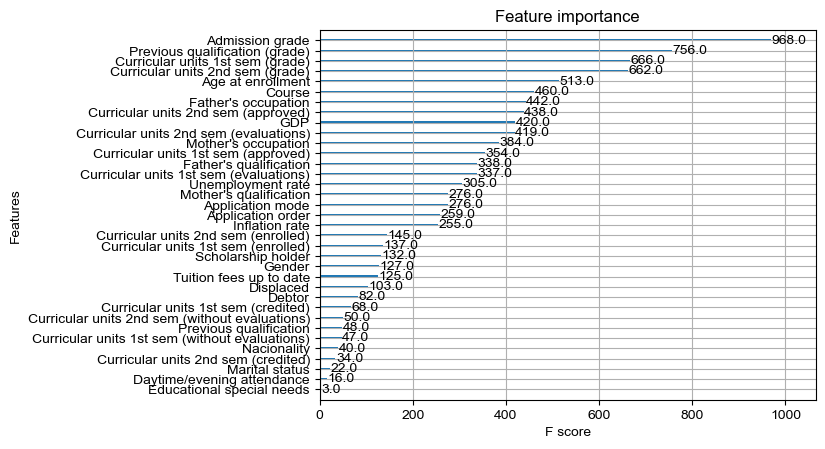

In [119]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Obtener importancia de las características
xgb.plot_importance(xgb_model, importance_type='weight')  # Puedes usar otros tipos como 'gain', 'cover'
plt.show()


GridSearchCV desde sklearn.model_selection, una herramienta que realiza una búsqueda exhaustiva sobre un conjunto de parámetros para encontrar la mejor combinación de hiperparámetros para un modelo de machine learning.

Este proceso de ajuste de hiperparámetros ayuda a mejorar el rendimiento del modelo de Random Forest al encontrar la combinación óptima de parámetros, asegurando que el modelo sea lo más efectivo posible para los datos.


In [121]:
from sklearn.model_selection import GridSearchCV

# Definir los parámetros para GridSearch
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Inicializar el modelo y GridSearch
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Ajustar el modelo a los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo
best_rf_model = grid_search.best_estimator_


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Mejores parámetros: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomizedSearchCV desde sklearn.model_selection, una herramienta que realiza una búsqueda aleatoria de hiperparámetros para encontrar la mejor combinación de parámetros para un modelo de machine learning.

En este fragmento de código utilizamos RandomizedSearchCV para encontrar los mejores hiperparámetros para un modelo de Random Forest optimizando su rendimiento.


In [122]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Definir el espacio de parámetros para RandomizedSearch
param_dist = {
    'n_estimators': randint(100, 1000),
    'max_depth': randint(3, 15),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 10)
}

# Inicializar el modelo y RandomizedSearch
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
random_search.fit(X_train, y_train)

# Mostrar los mejores parámetros
print("Mejores parámetros:", random_search.best_params_)

# Obtener el mejor modelo
best_rf_model = random_search.best_estimator_


Fitting 5 folds for each of 100 candidates, totalling 500 fits
Mejores parámetros: {'max_depth': 13, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 741}


Este bloque realiza una evaluación completa del rendimiento del modelo de Random Forest optimizado. Calcula varias métricas clave, como la precisión, recall, F1 score, y muestra un reporte de clasificación detallado para cada clase, lo que ayuda a entender cómo se desempeña el modelo en un contexto multiclase. 

In [126]:
# Realizar predicciones con el mejor modelo
y_pred_best = best_rf_model.predict(X_test)

# Evaluación del rendimiento
accuracy = accuracy_score(y_test, y_pred_best)
precision = precision_score(y_test, y_pred_best, average='macro')
recall = recall_score(y_test, y_pred_best, average='macro')
f1 = f1_score(y_test, y_pred_best, average='macro')

# Mostrar las métricas
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Mostrar el reporte de clasificación
print(classification_report(y_test, y_pred_best))


Accuracy: 0.766566265060241
Precision: 0.7182672219245694
Recall: 0.668987927465898
F1 Score: 0.6755789711235094
              precision    recall  f1-score   support

           0       0.81      0.77      0.79       441
           1       0.57      0.29      0.38       245
           2       0.77      0.94      0.85       642

    accuracy                           0.77      1328
   macro avg       0.72      0.67      0.68      1328
weighted avg       0.75      0.77      0.75      1328



In [129]:
import joblib

# Guardar el modelo
joblib.dump(best_rf_model, 'modelo_estudiantes_riesgo.pkl')


['modelo_estudiantes_riesgo.pkl']

In [131]:
# Cargar el modelo guardado
model_cargado = joblib.load('modelo_estudiantes_riesgo.pkl')
y_pred = model_cargado.predict(X_test)



In [ ]:
0: No riesgo.
1: Riesgo moderado.
2: Alto riesgo de abandono.

In [143]:
# Contar las predicciones de cada categoría de riesgo
no_riesgo = sum(y_pred_best == 0)  # Cuenta cuántos estudiantes no están en riesgo
riesgo_moderado = sum(y_pred_best == 1)  # Cuenta cuántos estudiantes están en riesgo moderado
alto_riesgo = sum(y_pred_best == 2)  # Cuenta cuántos estudiantes están en alto riesgo

# Mostrar los resultados
print(f"Estudiantes no en riesgo: {no_riesgo}")
print(f"Estudiantes en riesgo moderado: {riesgo_moderado}")
print(f"Estudiantes en alto riesgo de abandono: {alto_riesgo}")


Estudiantes no en riesgo: 419
Estudiantes en riesgo moderado: 125
Estudiantes en alto riesgo de abandono: 784


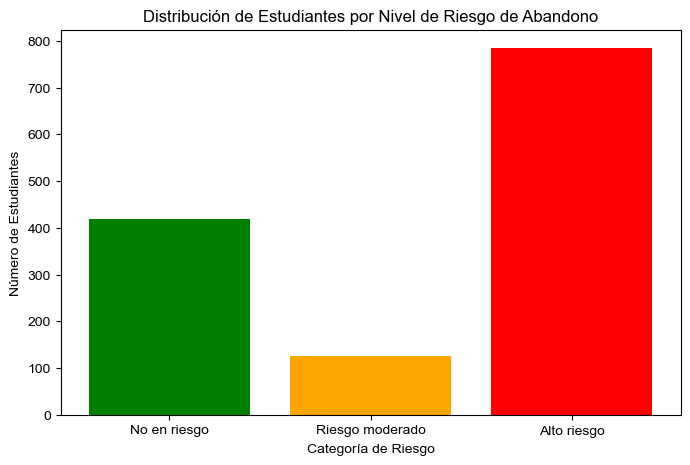

In [157]:
import matplotlib.pyplot as plt

# Datos para la gráfica
categorias = ['No en riesgo', 'Riesgo moderado', 'Alto riesgo']
conteo_estudiantes = [no_riesgo, riesgo_moderado, alto_riesgo]

# Crear la gráfica de barras
plt.figure(figsize=(8, 5))
plt.bar(categorias, conteo_estudiantes, color=['green', 'orange', 'red'])
plt.xlabel('Categoría de Riesgo')
plt.ylabel('Número de Estudiantes')
plt.title('Distribución de Estudiantes por Nivel de Riesgo de Abandono')
plt.show()


In [4]:
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("StudentData") \
    .getOrCreate()

# Cargar datos desde un archivo CSV
df = spark.read.option("delimiter", ";").csv("/Users/cristiangaytan/Downloads/data 2.csv", header=True, inferSchema=True)



24/12/05 21:23:24 WARN Utils: Your hostname, MacBook-Air-de-Cristian.local resolves to a loopback address: 127.0.0.1; using 192.168.100.128 instead (on interface en0)
24/12/05 21:23:24 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/12/05 21:23:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
print(df.columns)



['Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 'Inflation rate', 'GDP', 'Target']


In [6]:
df = df.withColumnRenamed("Marital status", "Marital_Status")


In [7]:
indexer = StringIndexer(inputCol="Marital_Status", outputCol="Marital_Status_Index")
df = indexer.fit(df).transform(df)


In [12]:
df = df.na.fill({"Age at enrollment": 18})

In [14]:
# Mostrar estadísticas descriptivas
df.describe().show()

# Ver el esquema de los datos
df.printSchema()


24/12/05 21:23:30 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+------------------+------------------+-----------------+----------------------------+----------------------+------------------------------+------------------+----------------------+----------------------+-------------------+-------------------+------------------+-------------------+-------------------------+-------------------+-----------------------+-------------------+-------------------+------------------+--------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+-----------------------------------+-----------------------------------+--------------------------------------+-----------------------------------+--------------------------------+----------------------------------------------+------------------+------------------+--------------------+--------+-----------------

In [16]:
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.feature import VectorAssembler

# Preparar las características (features)
assembler = VectorAssembler(inputCols=["Age at enrollment", "Admission grade", "Curricular units 1st sem (approved)"], outputCol="features")
df = assembler.transform(df)

# Dividir en entrenamiento y prueba
train_data, test_data = df.randomSplit([0.8, 0.2], seed=1234)

# Crear y entrenar el modelo
rf = RandomForestClassifier(labelCol="Displaced", featuresCol="features")
model = rf.fit(train_data)

# Realizar predicciones
predictions = model.transform(test_data)
predictions.select("Displaced", "prediction").show()


+---------+----------+
|Displaced|prediction|
+---------+----------+
|        0|       1.0|
|        0|       1.0|
|        1|       1.0|
|        0|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
|        1|       1.0|
+---------+----------+
only showing top 20 rows



In [18]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

evaluator = MulticlassClassificationEvaluator(labelCol="Displaced", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)
print("Accuracy:", accuracy)

Accuracy: 0.6922169811320755


In [24]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

# Para F1-Score
f1_evaluator = MulticlassClassificationEvaluator(labelCol="Displaced", predictionCol="prediction", metricName="f1")
f1_score = f1_evaluator.evaluate(predictions)
print("F1-Score:", f1_score)

# Para Precision
precision_evaluator = MulticlassClassificationEvaluator(labelCol="Displaced", predictionCol="prediction", metricName="weightedPrecision")
precision = precision_evaluator.evaluate(predictions)
print("Precision:", precision)

# Para Recall
recall_evaluator = MulticlassClassificationEvaluator(labelCol="Displaced", predictionCol="prediction", metricName="weightedRecall")
recall = recall_evaluator.evaluate(predictions)
print("Recall:", recall)


F1-Score: 0.6832532753346772
Precision: 0.7035746910709539
Recall: 0.6922169811320754


In [ ]:
# Cargar nuevos datos
new_data = spark.read.option("delimiter", ";").csv("/path/to/new_data.csv", header=True, inferSchema=True)

# Transformar las características en los nuevos datos
new_data = assembler.transform(new_data)

# Realizar predicciones sobre los nuevos datos
new_predictions = model.transform(new_data)

# Mostrar las predicciones de los nuevos datos
new_predictions.select("Displaced", "prediction").show()

# Guardar las predicciones en un archivo CSV
new_predictions.select("Displaced", "prediction").write.option("header", "true").csv("/path/to/save_predictions.csv")